### **一些import**

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

### **softmax 函數**

In [2]:
# 設定總共類別
c = 10
# 模擬輸出logits
x = np.random.rand(c)
# 計算陣列中logits的exp
exp = np.exp(x)
# 計算所有exp的總和
sum = np.sum(exp)
# 計算經過softmax後的probability array
p = exp / sum

print("隨機生成的logits:")
print(x)
print("softmax後的結果:")
print(p)

隨機生成的logits:
[0.49826238 0.58786874 0.0679156  0.78507368 0.41798996 0.32106082
 0.93388288 0.89164455 0.03528371 0.90980031]
softmax後的結果:
[0.09088327 0.099403   0.05909989 0.12107222 0.08387298 0.07612482
 0.14049844 0.13468761 0.05720248 0.1371553 ]


### **Linear Layer + ReLU Activation**

In [3]:
# 設定輸入維度
d_in = 10
# 設定輸出維度
d_out = 30

# 模擬神經網路輸入
x = np.ones((d_in, 1))
# 模擬神經網路權重
W = np.random.rand(d_out, d_in) * 10 - 5
# 模擬神經網路偏差值
b = np.random.rand(d_out, 1) * 10 - 5

# 進行運算
y = W @ x + b
for i in range (y.shape[0]) :
  for j in range (y.shape[1]) :
    if(y[i , j] < 0) :
      y[i , j] = 0

print("神經網路輸入:")
print(x)
print("神經網路輸出:")
print(y)

神經網路輸入:
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
神經網路輸出:
[[ 5.42310422]
 [21.18783934]
 [13.8795326 ]
 [ 0.        ]
 [ 8.7442971 ]
 [ 9.8002328 ]
 [ 5.61335543]
 [ 6.33713462]
 [ 0.        ]
 [ 0.71915114]
 [ 0.        ]
 [ 0.        ]
 [ 6.46467888]
 [17.88938613]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 5.42636631]
 [12.87976699]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 8.90620206]
 [ 2.67482634]
 [ 9.11414429]]


### **數值轉換**

In [4]:
dataframe = pd.read_csv("./467410-2022-08.csv")
# 新增欄位
dataframe.insert(dataframe.shape[1] , "日最高紫外線強度等級" , "")
dataframe.loc[0 , "日最高紫外線強度等級"] = "紫外線強度等級"
# 判斷
for i in range (1 , dataframe["日最高紫外線指數"].size) :
  if(int(dataframe.loc[i]["日最高紫外線指數"]) <= 2 and int(dataframe.loc[i]["日最高紫外線指數"]) >= 0) :
    dataframe.loc[i , "日最高紫外線強度等級"] = "低"
  elif(int(dataframe.loc[i]["日最高紫外線指數"]) <= 5 and int(dataframe.loc[i]["日最高紫外線指數"]) >= 3) :
    dataframe.loc[i , "日最高紫外線強度等級"] = "中"
  elif(int(dataframe.loc[i]["日最高紫外線指數"]) <= 7 and int(dataframe.loc[i]["日最高紫外線指數"]) >= 6) :
    dataframe.loc[i , "日最高紫外線強度等級"] = "高"
  elif(int(dataframe.loc[i]["日最高紫外線指數"]) <= 10 and int(dataframe.loc[i]["日最高紫外線指數"]) >= 8) :
    dataframe.loc[i , "日最高紫外線強度等級"] = "甚高"
  else :
    dataframe.loc[i , "日最高紫外線強度等級"] = "極高"

print("低:" , len(dataframe[dataframe["日最高紫外線強度等級"] == "低"]) , "次、" ,
   "中:" , len(dataframe[dataframe["日最高紫外線強度等級"] == "中"]) , "次、" ,
   "高:" , len(dataframe[dataframe["日最高紫外線強度等級"] == "高"]) , "次、" ,
   "甚高:" , len(dataframe[dataframe["日最高紫外線強度等級"] == "甚高"]) , "次、" ,
   "極高:" , len(dataframe[dataframe["日最高紫外線強度等級"] == "極高"]) , "次、" ,)
dataframe

低: 0 次、 中: 1 次、 高: 2 次、 甚高: 4 次、 極高: 24 次、


,觀測時間(day),測站氣壓(hPa),海平面氣壓(hPa),測站最高氣壓(hPa),測站最高氣壓時間(LST),測站最低氣壓(hPa),測站最低氣壓時間(LST),氣溫(℃),最高氣溫(℃),最高氣溫時間(LST),...,最大六十分鐘降水量(mm),最大六十分鐘降水量起始時間(LST),日照時數(hour),日照率(%),全天空日射量(MJ/㎡),能見度(km),日最高紫外線指數,日最高紫外線指數時間(LST),總雲量(0~10),日最高紫外線強度等級
0,ObsTime,StnPres,SeaPres,StnPresMax,StnPresMaxTime,StnPresMin,StnPresMinTime,Temperature,T Max,T Max Time,...,PrecpMax60,PrecpMax60Time,SunShine,SunshineRate,GloblRad,VisbMean,UVI Max,UVI Max Time,Cloud Amount,紫外線強度等級
1,01,1004.2,1007.3,1005.5,2022/08/01 22:09:00,1002.6,2022/08/01 02:00:00,29.3,33.2,2022/08/01 11:37:00,...,T,2022/08/01 16:24:00,3.1,23.4,17.11,20.0,11,2022/08/01 12:00:00,9.0,極高
2,02,1005.9,1009.0,1008.1,2022/08/02 10:34:00,1003.9,2022/08/02 16:38:00,27.5,28.9,2022/08/02 00:01:00,...,67.5,2022/08/02 09:42:00,0.0,0.0,6.34,14.0,4,2022/08/02 14:00:00,9.6,中
3,03,1006.1,1009.1,1007.3,2022/08/03 22:08:00,1004.6,2022/08/03 14:55:00,28.7,32.3,2022/08/03 11:07:00,...,T,2022/08/03 13:56:00,1.0,7.6,13.75,34.0,11,2022/08/03 11:00:00,9.4,極高
4,04,1006.7,1009.8,1008.5,2022/08/04 21:33:00,1005.4,2022/08/04 03:45:00,29.2,33.6,2022/08/04 12:51:00,...,2.0,2022/08/04 20:09:00,8.7,65.8,23.29,26.0,11,2022/08/04 11:00:00,5.0,極高
5,05,1006.7,1009.8,1007.7,2022/08/05 00:01:00,1004.8,2022/08/05 16:08:00,29.7,34.1,2022/08/05 12:16:00,...,1.0,2022/08/05 19:13:00,7.7,59.0,22.17,48.0,14,2022/08/05 12:00:00,6.4,極高
6,06,1005.5,1008.5,1007.3,2022/08/06 00:01:00,1003.4,2022/08/06 15:37:00,29.6,33.1,2022/08/06 10:37:00,...,0.5,2022/08/06 14:50:00,7.4,56.8,21.40,35.0,12,2022/08/06 13:00:00,5.6,極高
7,07,1005.3,1008.4,1007.3,2022/08/07 23:00:00,1003.4,2022/08/07 14:23:00,28.7,33.5,2022/08/07 11:55:00,...,35.0,2022/08/07 14:40:00,3.9,30.0,12.47,21.6,8,2022/08/07 12:00:00,7.2,甚高
8,08,1005.4,1008.5,1007.0,2022/08/08 00:01:00,1003.2,2022/08/08 15:21:00,29.5,34.3,2022/08/08 14:44:00,...,0.0,--,8.2,62.4,20.74,17.4,11,2022/08/08 11:00:00,5.4,極高
9,09,1005.1,1008.2,1006.8,2022/08/09 22:13:00,1003.6,2022/08/09 15:12:00,29.1,33.4,2022/08/09 12:04:00,...,11.0,2022/08/09 13:40:00,4.0,30.8,13.18,9.2,7,2022/08/09 12:00:00,8.0,高


### **條件篩選**

In [5]:
# T 更換成 0
dataframe1 = pd.read_csv("./467410-2022-08.csv")
for i in range (len(dataframe1)) :
  if dataframe1.loc[i , "降水量(mm)"] == "T" :
    dataframe1.loc[i , "降水量(mm)"] = "0.0"
# print(dataframe1["降水量(mm)"])
# 新增欄位
dataframe1.insert(dataframe1.shape[1] , "日降雨強度" , "")
dataframe1.loc[0 , "日降雨強度"] = 0
for i in range (1 , len(dataframe1)) :
  if(float(dataframe1["降水時數(hour)"][i]) == 0) :
    dataframe1.loc[i , "日降雨強度"] = 0
  else :
    dataframe1.loc[i , "日降雨強度"] = (float(dataframe1.loc[i , "降水量(mm)"]) / float(dataframe1.loc[i , "降水時數(hour)"])) ;

# 計算平均強度
total = 0
for i in range(1 , len(dataframe1["日降雨強度"])) :
  total = total + dataframe1.loc[i , "日降雨強度"]
rain_ave = total / (len(dataframe1["日降雨強度"]) - 1)
# 降水強度大於平均強度的日期及其相關資訊。
larger = dataframe1[dataframe1["日降雨強度"] > rain_ave]
larger

,觀測時間(day),測站氣壓(hPa),海平面氣壓(hPa),測站最高氣壓(hPa),測站最高氣壓時間(LST),測站最低氣壓(hPa),測站最低氣壓時間(LST),氣溫(℃),最高氣溫(℃),最高氣溫時間(LST),...,最大六十分鐘降水量(mm),最大六十分鐘降水量起始時間(LST),日照時數(hour),日照率(%),全天空日射量(MJ/㎡),能見度(km),日最高紫外線指數,日最高紫外線指數時間(LST),總雲量(0~10),日降雨強度
2,02,1005.9,1009.0,1008.1,2022/08/02 10:34:00,1003.9,2022/08/02 16:38:00,27.5,28.9,2022/08/02 00:01:00,...,67.5,2022/08/02 09:42:00,0.0,0.0,6.34,14.0,4,2022/08/02 14:00:00,9.6,25.277778
7,07,1005.3,1008.4,1007.3,2022/08/07 23:00:00,1003.4,2022/08/07 14:23:00,28.7,33.5,2022/08/07 11:55:00,...,35.0,2022/08/07 14:40:00,3.9,30.0,12.47,21.6,8,2022/08/07 12:00:00,7.2,13.035714
9,09,1005.1,1008.2,1006.8,2022/08/09 22:13:00,1003.6,2022/08/09 15:12:00,29.1,33.4,2022/08/09 12:04:00,...,11.0,2022/08/09 13:40:00,4.0,30.8,13.18,9.2,7,2022/08/09 12:00:00,8.0,6.764706
10,10,1005.7,1008.8,1007.8,2022/08/10 21:25:00,1003.7,2022/08/10 05:50:00,28.9,34.9,2022/08/10 13:40:00,...,19.0,2022/08/10 16:04:00,7.2,54.9,20.33,22.0,13,2022/08/10 13:00:00,4.6,9.354839
15,15,1004.1,1007.2,1005.1,2022/08/15 21:49:00,1002.9,2022/08/15 13:51:00,28.8,33.1,2022/08/15 13:36:00,...,18.5,2022/08/15 14:33:00,2.8,21.5,12.11,24.0,8,2022/08/15 14:00:00,8.2,8.2
16,16,1004.3,1007.4,1006.0,2022/08/16 22:42:00,1002.8,2022/08/16 14:42:00,28.8,33.9,2022/08/16 11:34:00,...,14.5,2022/08/16 14:02:00,6.9,53.7,18.03,22.0,11,2022/08/16 11:00:00,5.4,9.047619
17,17,1004.8,1007.9,1006.4,2022/08/17 21:48:00,1002.9,2022/08/17 15:31:00,28.5,32.2,2022/08/17 11:51:00,...,17.0,2022/08/17 17:43:00,4.2,32.4,18.91,40.0,13,2022/08/17 13:00:00,7.2,6.511628
18,18,1004.5,1007.6,1005.8,2022/08/18 22:53:00,1003.0,2022/08/18 04:12:00,27.1,31.1,2022/08/18 10:22:00,...,29.0,2022/08/18 12:47:00,1.0,7.8,8.92,22.0,7,2022/08/18 10:00:00,9.8,12.916667


### **折線圖**

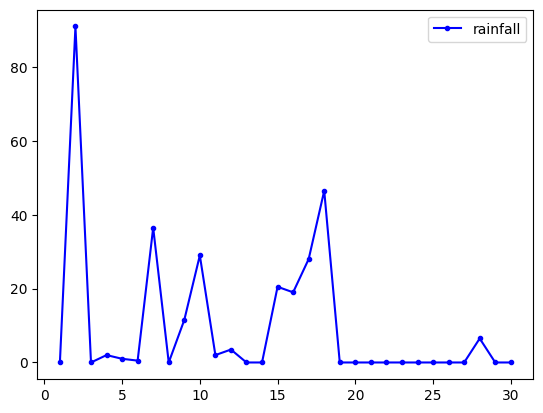

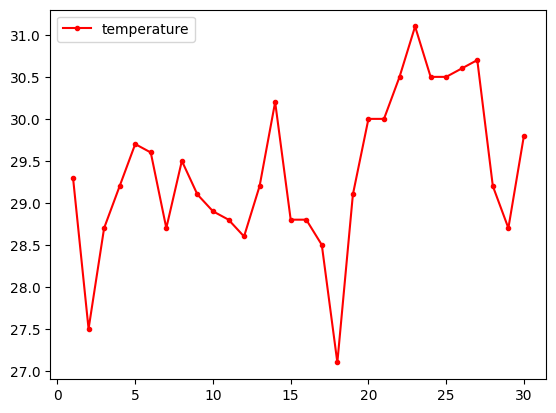

In [6]:
# 裡面資料為string，轉換成float
time = dataframe1["觀測時間(day)"].iloc[1:-1].astype(float)
rain_y = (dataframe1["降水量(mm)"].iloc[1:-1]).astype(float)
temp_y = (dataframe1["氣溫(℃)"].iloc[1:-1]).astype(float)
# 繪製
plt.plot(time , rain_y , color = "blue" , label = "rainfall" , marker = '.')
plt.legend()
plt.show()
print()
plt.plot(time , temp_y , color = "red" , label = "temperature" , marker = '.')
plt.legend()
plt.show()

### **雷達圖**

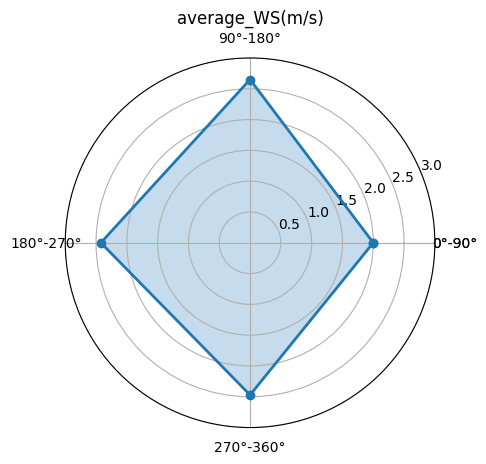

In [7]:
# 先轉換成float
degree = dataframe1["風向(360degree)"].iloc[1:-1].astype(float)
speed = (dataframe1["風速(m/s)"].iloc[1:-1]).astype(float)
# 合併兩個data
wind_data = pd.concat([degree , speed] , axis = 1)
# 宣告空list
ave_speed_list = []
# 宣告上下界
low = 0
high = 90
# 篩選資料並計算
for i in range(4) :
  d = wind_data[(wind_data["風向(360degree)"] <= high) & (wind_data["風向(360degree)"] > low)]
  temp = d["風速(m/s)"].sum()
  average = temp / len(d)
  ave_speed_list.append(average)
  low += 90
  high += 90

ave_speed = np.array(ave_speed_list)
# 雷達圖的label
wind_degree = np.array([u"0°-90°", u"90°-180°", u"180°-270°", u"270°-360°"])
# 雷達圖之x , y
angles = np.linspace(0, 2 * np.pi, len(wind_degree), endpoint = False)
stats = np.concatenate((ave_speed , [ave_speed[0]]))
angles = np.concatenate((angles, [angles[0]]))
wind_degree = np.concatenate((wind_degree, [wind_degree[0]]))

ax = plt.figure().add_subplot(111, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2)
ax.fill(angles, stats, alpha = 0.25)
ax.set_ylim(0 , 3)
ax.grid(True)
ax.set_title("average_WS(m/s)")
ax.set_thetagrids(angles * 180 / np.pi , wind_degree)
plt.show()

### **改善決策樹分類模型**

In [14]:
df = pd.read_csv('./train.csv')

# 取出訓練資料需要分析的資料欄位
df_x = df[['Sex', 'Age', 'Fare']]        
# 取出訓練資料的答案
df_y = df['Survived']

# 數值型態資料前處理
# 創造 imputer 並設定填補策略
imputer = SimpleImputer(strategy='median')        
age = df_x['Age'].to_numpy().reshape(-1, 1)
# 根據資料學習需要填補的值
imputer.fit(age)                                  
# 填補缺失值
df_x.loc[:, 'Age'] = imputer.transform(age)           

# 類別型態資料前處理
# 創造 Label Encoder
le = LabelEncoder()                               
# 給予每個類別一個數值
le.fit(df_x['Sex'])                            
# 轉換所有類別成為數值
df_x.loc[:,'Sex'] = le.transform(df_x['Sex'])

# 分割 train and test sets，random_state 固定為 1012
train_x, test_x, train_y, test_y = train_test_split(df_x, df_y, train_size=0.8, random_state=1012)

# 創造決策樹模型
model = DecisionTreeClassifier(random_state=1012) 
# 訓練決策樹模型
model.fit(train_x, train_y)                       

# 確認模型是否訓練成功
pred_train = model.predict(train_x)                   
# 計算準確度
train_acc = accuracy_score(train_y, pred_train)             

# 輸出準確度
print('train accuracy: {}'.format(train_acc)) 

# 確認模型是否訓練成功
pred_test = model.predict(test_x)                   
# 計算準確度
test_acc = accuracy_score(test_y, pred_test)             

# 輸出準確度
print('test accuracy: {}'.format(test_acc)) 

train accuracy: 0.9831460674157303
test accuracy: 0.7262569832402235
